<a href="https://colab.research.google.com/github/mehedisaurav61-rgb/23227727-Mehedi/blob/main/starter_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🌦️ WeatherWise – Starter Notebook

Welcome to your **WeatherWise** project notebook! This scaffold is designed to help you build your weather advisor app using Python, visualisations, and AI-enhanced development.

---

📄 **Full Assignment Specification**  
See [`ASSIGNMENT.md`](ASSIGNMENT.md) or check the LMS for full details.

📝 **Quick Refresher**  
A one-page summary is available in [`resources/assignment-summary.md`](resources/assignment-summary.md).

---

🧠 **This Notebook Structure is Optional**  
You’re encouraged to reorganise, rename sections, or remove scaffold cells if you prefer — as long as your final version meets the requirements.

✅ You may delete this note before submission.



## 🧰 Setup and Imports

This section imports commonly used packages and installs any additional tools used in the project.

- You may not need all of these unless you're using specific features (e.g. visualisations, advanced prompting).
- The notebook assumes the following packages are **pre-installed** in the provided environment or installable via pip:
  - `requests`, `matplotlib`, `pyinputplus`
  - `fetch-my-weather` (for accessing weather data easily)
  - `hands-on-ai` (for AI logging, comparisons, or prompting tools)

If you're running this notebook in **Google Colab**, uncomment the following lines to install the required packages.


In [1]:
# 🧪 Optional packages — uncomment if needed in Colab or JupyterHub
!pip install fetch-my-weather
!pip install hands-on-ai
!pip install pyinputplus

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.7/143.7 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.5/155.5 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 56.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.0/253.0 kB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.0/71.0 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 352.0/352.0 kB 23.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.5/80.5 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 517.7/517.7 kB 30.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 107.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 456.8/456.8 kB 31.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 72.3 MB/s eta 0:00:00
  Attempting uninstall: jiter
    Found existin

In [2]:
import os

os.environ['HANDS_ON_AI_SERVER'] = 'http://ollama.serveur.au'
os.environ['HANDS_ON_AI_MODEL'] = 'granite3.2'
os.environ['HANDS_ON_AI_API_KEY'] = input('Enter your API key: ')
# 441915a2f12b41dabfa42abeefbf5ef1.REHYReDU21hQ6csGWn5wme6C

Enter your API key: 441915a2f12b41dabfa42abeefbf5ef1.REHYReDU21hQ6csGWn5wme6C


## 📦 Setup and Configuration
Import required packages and setup environment.

In [3]:
import requests
import matplotlib.pyplot as plt
import pyinputplus as pyip
# ✅ Import after installing (if needed)
from fetch_my_weather import get_weather
from hands_on_ai.chat import get_response

# Add any other setup code here

## 🌤️ Weather Data Functions

In [21]:
import requests

def get_weather_data(location, forecast_days=5):
    """
    Retrieve weather forecast data (temperature + precipitation) from wttr.in.

    Args:
        location (str): City or location name.
        forecast_days (int): Number of days to fetch (1–5).

    Returns:
        dict: Structured data with current conditions and multi-day forecast.
    """
    if not 1 <= forecast_days <= 5:
        raise ValueError("forecast_days must be between 1 and 5")

    try:
        url = f"https://wttr.in/{location}?format=j1"
        response = requests.get(url)
        response.raise_for_status()
        data = response.json()

        current_condition = data.get("current_condition", [{}])[0]
        full_forecast = data.get("weather", [])[:forecast_days]

        # Keep both temp and precip info
        weather_data = {
            "location": data.get("nearest_area", [{}])[0].get("areaName", [{}])[0].get("value", location),
            "current_condition": current_condition,
            "forecast": full_forecast,
            "raw_data": data
        }

        return weather_data

    except requests.RequestException as e:
        return {"error": f"Failed to retrieve weather data: {e}"}
    except ValueError as e:
        return {"error": str(e)}


In [ ]:
print(get_weather_data('bangladesh', 3))

{'location': 'bangladesh', 'current_condition': {'FeelsLikeC': '36', 'FeelsLikeF': '97', 'cloudcover': '23', 'humidity': '61', 'localObsDateTime': '2025-10-16 02:43 PM', 'observation_time': '08:43 AM', 'precipInches': '0.0', 'precipMM': '0.0', 'pressure': '1007', 'pressureInches': '30', 'temp_C': '31', 'temp_F': '89', 'uvIndex': '5', 'visibility': '10', 'visibilityMiles': '6', 'weatherCode': '113', 'weatherDesc': [{'value': 'Sunny'}], 'weatherIconUrl': [{'value': ''}], 'winddir16Point': 'W', 'winddirDegree': '266', 'windspeedKmph': '6', 'windspeedMiles': '4'}, 'forecast': [{'astronomy': [{'moon_illumination': '27', 'moon_phase': 'Waning Crescent', 'moonrise': '01:11 AM', 'moonset': '02:37 PM', 'sunrise': '05:57 AM', 'sunset': '05:31 PM'}], 'avgtempC': '27', 'avgtempF': '80', 'date': '2025-10-16', 'hourly': [{'DewPointC': '22', 'DewPointF': '72', 'FeelsLikeC': '26', 'FeelsLikeF': '79', 'HeatIndexC': '26', 'HeatIndexF': '79', 'WindChillC': '24', 'WindChillF': '75', 'WindGustKmph': '13', 

## 📊 Visualisation Functions

In [5]:
import matplotlib.pyplot as plt

def create_temperature_visualisation(weather_data, output_type='display'):

    forecast = weather_data.get("forecast", [])

    dates = [day["date"] for day in forecast]
    max_temps = [int(day["maxtempC"]) for day in forecast]
    min_temps = [int(day["mintempC"]) for day in forecast]

    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(dates, max_temps, label="Max Temp (°C)", color="red", marker='o')
    ax.plot(dates, min_temps, label="Min Temp (°C)", color="blue", marker='o')

    ax.set_title(f"Temperature Forecast for {weather_data['location'].title()}")
    ax.set_xlabel("Date")
    ax.set_ylabel("Temperature (°C)")
    ax.legend()
    ax.grid(True)

    if output_type == 'figure':
        return fig
    else:
        plt.show()


In [26]:
import matplotlib.pyplot as plt

def create_precipitation_visualisation(weather_data, output_type='display'):
    """
    Visualize daily total precipitation (rainfall) from wttr.in forecast data.

    Args:
        weather_data (dict): Data returned by get_weather_data().
        output_type (str): 'display' to show the plot or 'figure' to return it.
    """
    forecast = weather_data.get("forecast", [])
    if not forecast:
        print("No forecast data available.")
        return

    dates = []
    total_precip = []

    for day in forecast:
        date = day.get("date", "Unknown")
        dates.append(date)

        # Sum hourly precipitation
        hourly = day.get("hourly", [])
        total_mm = sum(float(h.get("precipMM", 0.0)) for h in hourly)
        total_precip.append(total_mm)

    # --- Create bar chart ---
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.bar(dates, total_precip, color="skyblue", edgecolor="black")

    ax.set_title(f"Daily Precipitation Forecast for {weather_data.get('location', '')}")
    ax.set_xlabel("Date")
    ax.set_ylabel("Total Precipitation (mm)")
    plt.xticks(rotation=45, ha="right")
    ax.grid(axis='y', linestyle="--", alpha=0.7)
    plt.tight_layout()

    if output_type == 'figure':
        return fig
    else:
        plt.show()


## 🤖 Natural Language Processing

In [28]:
def parse_weather_question(question):
    """
    Parse a natural language weather question.

    Args:
        question (str): User's weather-related question.

    Returns:
        dict: Extracted info with keys: location, attribute, and time.
    """

    # Normalize text for simple matching
    q = question.lower().strip()

    # Default values
    location = None
    attribute = "weather"   # default to general weather if not specified
    time_period = "today"   # default to today

    # --- Detect attribute ---
    if "precipitation" in q or "rain" in q:
        attribute = "precipitation"
    elif "temperature" in q:
        attribute = "temperature"
    elif "wind" in q:
        attribute = "wind"

    # --- Detect time ---
    if "tomorrow" in q:
        time_period = "tomorrow"
    elif "today" in q:
        time_period = "today"
    elif "next week" in q:
        time_period = "next week"

    # --- Detect location ---
    # (Assume location is the last word or follows 'in' or 'of')
    words = q.split()
    if "in" in words:
        idx = words.index("in")
        if idx + 1 < len(words):
            location = words[idx + 1].strip("?.!,")
    elif "of" in words:
        idx = words.index("of")
        if idx + 1 < len(words):
            location = words[idx + 1].strip("?.!,")
    else:
        # fallback: last word as location guess
        location = words[-1].strip("?.!,")

    # --- Return structured result ---
    return {
        "location": location,
        "attribute": attribute,
        "time": time_period
    }


## 🧭 User Interface

Ask a weather question like what will be weather of perth today): what will be temperature of perth today


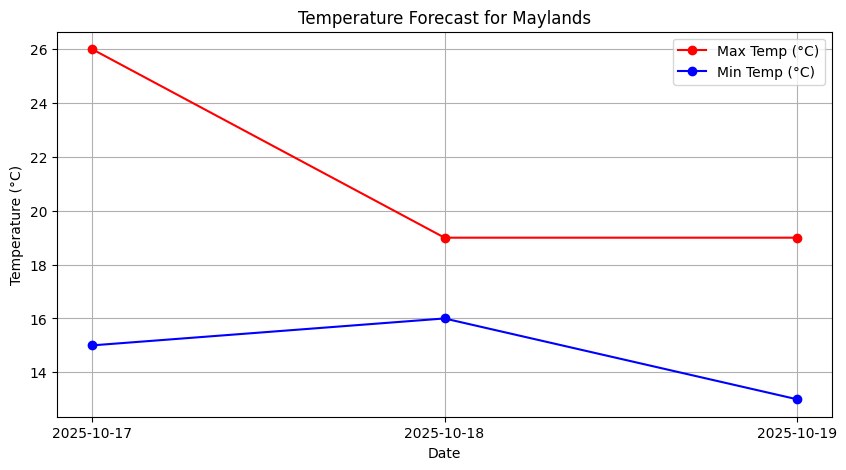

In Perth today, the temperature will range between 15°C and 26°C, with an average of 20°C.


In [38]:
# Define menu functions using pyinputplus or ipywidgets here
def main():
    """
    Main function to interact with the user and provide weather information.
    """
    # Step 1: Ask the user for a weather question
    question = input("Ask a weather question like what will be weather of perth today): ")

    # Step 2: Parse the question
    parsed_question = parse_weather_question(question)
    if not parsed_question:
        print("Sorry, I couldn't understand your question.")
        return

    # Step 3: Fetch weather data for the location
    location = parsed_question.get("location")
    weather_data = get_weather_data(location)
    if "error" in weather_data:
        print(weather_data["error"])
        return

    # Step 4: Generate a natural language response
    response = generate_weather_response(parsed_question, weather_data)

    # Step 5: Show the response
    print(response)

    # Optional: Show precipitation visualization if the question is about precipitation
    if parsed_question.get("attribute") == "precipitation":
        create_precipitation_visualisation(weather_data)

# Run the main function
if __name__ == "__main__":
    main()


## 🧩 Main Application Logic

In [37]:
def generate_weather_response(parsed_question, weather_data):
    """
    Generate a natural language response to a weather question
    and show relevant visualisations.

    Args:
        parsed_question (dict): Parsed question data (location, attribute, time)
        weather_data (dict): Weather data returned by get_weather_data()

    Returns:
        str: Natural language response.
    """
    # Check if weather data is valid
    if not weather_data or not isinstance(weather_data, dict) or "error" in weather_data:
        return "Sorry, I couldn’t retrieve the weather information right now."

    # Extract parsed question info
    location = parsed_question.get("location", "the location").capitalize()
    attribute = parsed_question.get("attribute", "weather").lower()
    time_period = parsed_question.get("time", "today").lower()

    forecast = weather_data.get("forecast", [])
    if not forecast:
        return f"Sorry, I couldn't find forecast data for {location}."

    # Select the day based on 'today' or 'tomorrow'
    if time_period == "tomorrow" and len(forecast) > 1:
        day_data = forecast[1]
    else:
        day_data = forecast[0]

    # Precipitation response
    if attribute == "precipitation":
        hourly = day_data.get("hourly", [])
        total_precip = sum(float(h.get("precipMM", 0.0)) for h in hourly)

        # Visualisation
        create_precipitation_visualisation(weather_data)

        return f"The total precipitation in {location} {time_period} is expected to be about {total_precip:.1f} mm."

    # Temperature response
    elif attribute == "temperature":
        avg_temp = day_data.get("avgtempC", "N/A")
        max_temp = day_data.get("maxtempC", "N/A")
        min_temp = day_data.get("mintempC", "N/A")

        # Visualisation
        create_temperature_visualisation(weather_data)

        return f"In {location} {time_period}, the temperature will range between {min_temp}°C and {max_temp}°C, with an average of {avg_temp}°C."

    # Wind response
    elif attribute == "wind":
        avg_wind = day_data.get("hourly", [{}])[0].get("windspeedKmph", "N/A")
        return f"The average wind speed in {location} {time_period} will be around {avg_wind} km/h."

    # General weather response
    else:
        desc = day_data.get("hourly", [{}])[0].get("weatherDesc", [{}])[0].get("value", "clear")
        avg_temp = day_data.get("avgtempC", "N/A")
        total_precip = sum(float(h.get("precipMM", 0.0)) for h in day_data.get("hourly", []))

        # Visualisations
        create_temperature_visualisation(weather_data)
        create_precipitation_visualisation(weather_data)

        return f"The weather in {location} {time_period} will be {desc.lower()}, with an average temperature of {avg_temp}°C and about {total_precip:.1f} mm of precipitation."


## 🧪 Testing and Examples

In [ ]:
# Include sample input/output for each function

## 🗂️ AI Prompting Log (Optional)
Add markdown cells here summarising prompts used or link to AI conversations in the `ai-conversations/` folder.